In [1]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from train_valid_split import train_valid_split
from extract_csi import extract_csi
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
class CSIModelConfig:
    def __init__(self, win_len, step, thrshd, downsample):
        self._win_len = win_len
        self._step = step
        self._thrshd = thrshd
        self._labels = ("bed", "fall", "pickup", "run", "sitdown", "standup", "walk")
        self._downsample = downsample

    def preprocessing(self, raw_folder, save=False):
        numpy_tuple = extract_csi(raw_folder, self._labels, save, self._win_len, self._thrshd, self._step)
        if self._downsample > 1:
            return tuple([v[:, ::self._downsample, ...] if i % 2 == 0 else v for i, v in enumerate(numpy_tuple)])
        return numpy_tuple

cfg = CSIModelConfig(win_len=1000, step=200, thrshd=0.6, downsample=2)
raw_folder = os.path.join(os.getcwd(), 'Dataset')
numpy_tuple = cfg.preprocessing(raw_folder, save=False)

x_bed, y_bed, x_fall, y_fall, x_pickup, y_pickup, x_run, y_run, x_sitdown, y_sitdown, x_standup, y_standup, x_walk, y_walk = numpy_tuple
x_train, y_train, x_valid, y_valid = train_valid_split(
    (x_bed, x_fall, x_pickup, x_run, x_sitdown, x_standup, x_walk),
    train_portion=0.8, 
    seed=379
)

print("Train Data Shape: ", x_train.shape, y_train.shape)
print("Validation Data Shape: ", x_valid.shape, y_valid.shape)

Finished 1.69% for Label bed
Finished 3.39% for Label bed
Finished 5.08% for Label bed
Finished 6.78% for Label bed
Finished 8.47% for Label bed
Finished 10.17% for Label bed
Finished 11.86% for Label bed
Finished 13.56% for Label bed
Finished 15.25% for Label bed
Finished 16.95% for Label bed
Finished 18.64% for Label bed
Finished 20.34% for Label bed
Finished 22.03% for Label bed
Finished 23.73% for Label bed
Finished 25.42% for Label bed
Finished 27.12% for Label bed
Finished 28.81% for Label bed
Finished 30.51% for Label bed
Finished 32.20% for Label bed
Finished 33.90% for Label bed
Finished 35.59% for Label bed
Finished 37.29% for Label bed
Finished 38.98% for Label bed
Finished 40.68% for Label bed
Finished 42.37% for Label bed
Finished 44.07% for Label bed
Finished 45.76% for Label bed
Finished 47.46% for Label bed
Finished 49.15% for Label bed
Finished 50.85% for Label bed
Finished 52.54% for Label bed
Finished 54.24% for Label bed
Finished 55.93% for Label bed
Finished 57.63%

In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train.reshape(x_train.shape[0], -1), np.argmax(y_train, axis=1))

y_pred = rf_model.predict(x_valid.reshape(x_valid.shape[0], -1))
accuracy = accuracy_score(np.argmax(y_valid, axis=1), y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.91


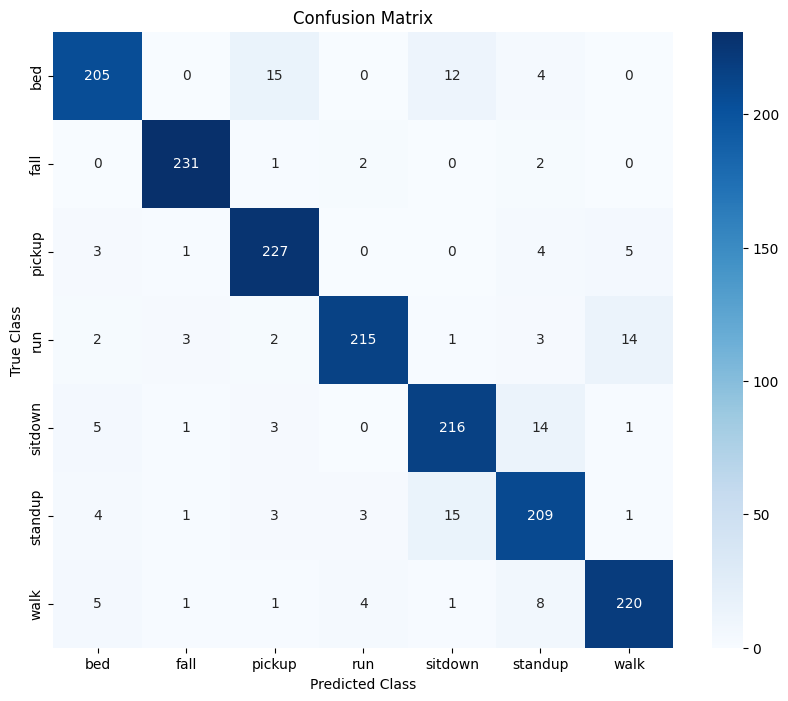

In [5]:
cm = confusion_matrix(np.argmax(y_valid, axis=1), y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cfg._labels, yticklabels=cfg._labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()